# NBA API


#### Calling the API


In [46]:
import requests
import json
import csv
import pandas as pd
import seaborn as sns

In [26]:
response = requests.get("https://www.balldontlie.io/api/v1/games")
nba_games = response.json()

In [27]:
def select_data(data):
    return {
        "season": data["season"],
        "team": data["home_team"]["full_name"],
        "score": data["home_team_score"],
        "competitor": data["home_team"]["full_name"],
        "competitor_score": data["visitor_team_score"],
    }

game = [select_data(g) for g in nba_games['data']]

print(f'{len(game)} games were found')
game[0]

25 games were found


{'season': 2018,
 'team': 'Boston Celtics',
 'score': 126,
 'competitor': 'Boston Celtics',
 'competitor_score': 94}

#### creating panda dataframe


In [28]:
headers = ["season", "team", "score", "competitor", "competitor_score",]

with open("data/nba_games.csv", "w", newline='') as file:
    f = csv.writer(file)
    f.writerow(headers)
    for g in game:
        values = [g[h] for h in headers]
        f.writerow(values)


In [42]:
Games = pd.read_csv('data/nba_games.csv')

In [43]:
Games.dtypes

season               int64
team                object
score                int64
competitor          object
competitor_score     int64
dtype: object

In [45]:
Games.isna().sum()



season              0
team                0
score               0
competitor          0
competitor_score    0
dtype: int64

In [47]:
Games.head()

,season,team,score,competitor,competitor_score
0,2018,Boston Celtics,126,Boston Celtics,94
1,2018,Boston Celtics,112,Boston Celtics,123
2,2018,Philadelphia 76ers,117,Philadelphia 76ers,110
3,2018,Washington Wizards,119,Washington Wizards,106
4,2018,Sacramento Kings,102,Sacramento Kings,96


In [48]:
Games["team"].value_counts()

Atlanta Hawks            3
Boston Celtics           2
Philadelphia 76ers       2
Sacramento Kings         2
Indiana Pacers           2
Chicago Bulls            2
Houston Rockets          2
Golden State Warriors    2
Washington Wizards       1
Detroit Pistons          1
New Orleans Pelicans     1
Utah Jazz                1
Dallas Mavericks         1
Milwaukee Bucks          1
Toronto Raptors          1
Memphis Grizzlies        1
Name: team, dtype: int64

<AxesSubplot: xlabel='score', ylabel='competitor_score'>

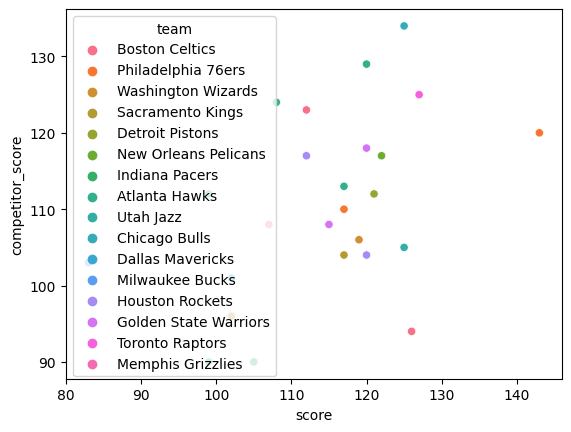

In [53]:
sns.scatterplot(data=Games, x="score", y="competitor_score", hue="team")

In [55]:
sns.histplot(data=Games, x="score"

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>